# **Linear Algebra Final project**
**Student Name:** Amirali Khatib

**Student ID:** 9722743149

**Professor Name:** Dr. Mohammadreza-R Akbarzadeh-T

# Import required libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# **Part I: Stock prediction**

In this part of the project, we are given 225 days split of the specific stock trend. We'll implement the asked things below:

first of all, we should read the data csv file and add day number as a column to our dataset.

In [2]:
df = pd.read_excel('Q1.xlsx')

In [3]:
df.head()

,VolumeTrade,ClosePrice
0,13981059.0,117060.0
1,14638230.0,116380.0
2,16481844.0,112540.0
3,15047314.0,113040.0
4,13078436.0,116980.0


In [4]:
len(df)

225

In [5]:
df['day'] = [i+1 for i in range(len(df))]

In [6]:
df = df.loc[:][['day', 'VolumeTrade', 'ClosePrice']]

In [7]:
df.head()

,day,VolumeTrade,ClosePrice
0,1,13981059.0,117060.0
1,2,14638230.0,116380.0
2,3,16481844.0,112540.0
3,4,15047314.0,113040.0
4,5,13078436.0,116980.0


## Question A:
plot the time series of **close price**

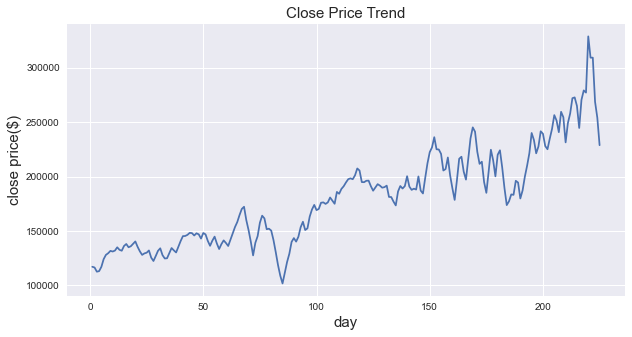

In [8]:
plt.figure(figsize=(10,5))
plt.title('Close Price Trend', fontsize = 15)
sns.lineplot(data=df, x='day', y = 'ClosePrice')
plt.xlabel(xlabel= 'day', fontsize = 15)
plt.ylabel(ylabel='close price($)',fontsize = 15)
plt.show()

We also plot the **Trade volume** time series optionally

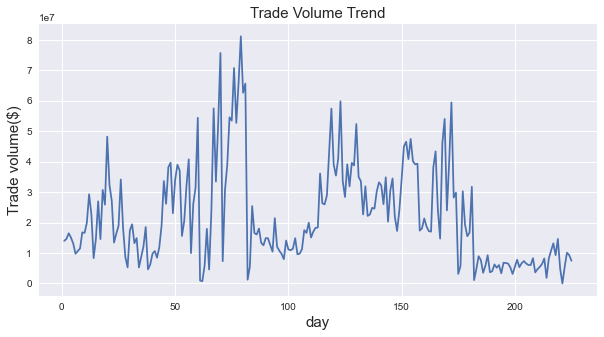

In [9]:
plt.figure(figsize=(10,5))
plt.title('Trade Volume Trend', fontsize = 15)
sns.lineplot(data = df, x = 'day', y = 'VolumeTrade')
plt.xlabel(xlabel= 'day', fontsize = 15)
plt.ylabel(ylabel='Trade volume($)',fontsize = 15)
plt.show()

## Question B:

Use a time series model for close price value and also implement least square method for fitting linear regression model on close price data.

### **Moving Average (window = 25)**

Moving average model with window of 25 is our chosen time series model. Here is the formula of Moving average with window of **w**:

$ \hat A_{t} = \frac {A_{t-1} + A_{t-2} + ... + A_{t-w}}{w}$  ```for t in range(w+1, 225)```

The green line in the Chart below stands for **MA** time series model.

In [10]:
win = 25
df[f'Moving Avg_{win}'] = df['ClosePrice'].rolling(window= win).mean().shift(1)

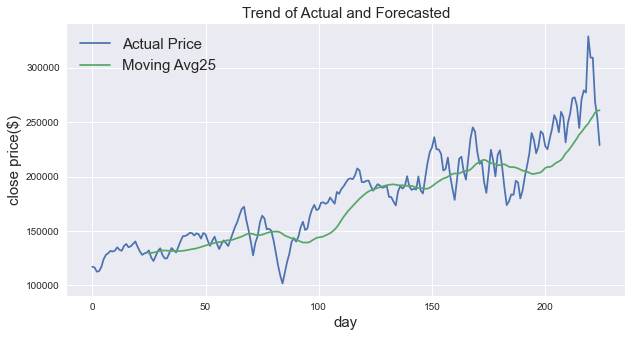

In [11]:
plt.figure(figsize=(10,5))
plt.ylabel('close price($)',fontsize = 15)
plt.xlabel('day', fontsize = 15)
plt.title('Trend of Actual and Forecasted', fontsize = 15)
plt.plot(df['ClosePrice'], label = 'Actual Price')
plt.plot(df[f'Moving Avg_{win}'], label = f'Moving Avg{win}')
plt.legend(fontsize = 15)
plt.show()

### **Least Squares Error method**

Another model that we want to fit on the data is Least squares error method which is widely use in linear regression.

The first step in implementation of **LSE** is to construct the **A** and **B** matrix.

In [12]:
A = np.column_stack(([1 for i in range(1,len(df)+1)], df['day']))
B = np.array(df['ClosePrice'])
A.shape, B.shape

((225, 2), (225,))

Estimation of intercept and slope are the entries of $\hat X$

$ \hat X = (A^{T}A)^{-1}A^{T}Y$

the prediction of target value is defined below:

$ \hat Y = A\hat X  = A(A^{T}A)^{-1}A^{T}Y$

In [13]:
def LSE(A,B):
    temp = np.dot(A.T, B)
    temp = np.dot(np.linalg.inv(np.dot(A.T,A)), temp)
    temp = np.dot(A,temp)
    return temp

In [14]:
p = LSE(A, B)

In [15]:
len(p)

225

In [16]:
df.head()

,day,VolumeTrade,ClosePrice,Moving Avg_25
0,1,13981059.0,117060.0,NaN
1,2,14638230.0,116380.0,NaN
2,3,16481844.0,112540.0,NaN
3,4,15047314.0,113040.0,NaN
4,5,13078436.0,116980.0,NaN


In [17]:
Output = {
    'day': A[:,1],
    'LSE': p
}
df_output = pd.DataFrame(Output)
df_output.head()

,day,LSE
0,1,110750.998623
1,2,111367.053596
2,3,111983.108569
3,4,112599.163541
4,5,113215.218514


In [18]:
df = pd.merge(df, df_output, how="outer", on=["day"])

In [19]:
df

,day,VolumeTrade,ClosePrice,Moving Avg_25,LSE
0,1,13981059.0,117060.0,NaN,110750.998623
1,2,14638230.0,116380.0,NaN,111367.053596
2,3,16481844.0,112540.0,NaN,111983.108569
3,4,15047314.0,113040.0,NaN,112599.163541
4,5,13078436.0,116980.0,NaN,113215.218514
...,...,...,...,...,...
220,221,0.0,309210.0,252208.8,246283.092597
221,222,5395047.0,309210.0,255234.4,246899.147570
222,223,10086715.0,268660.0,258750.0,247515.202542
223,224,9319007.0,253990.0,260392.8,248131.257515


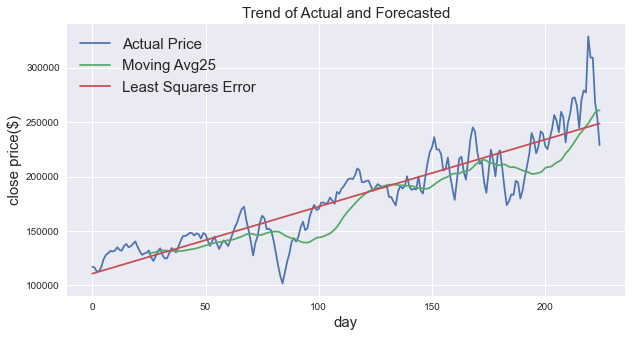

In [20]:
plt.figure(figsize=(10,5))
plt.ylabel('close price($)', fontsize = 15)
plt.xlabel('day', fontsize = 15)
plt.title('Trend of Actual and Forecasted', fontsize = 15)
plt.plot(df['ClosePrice'], label = 'Actual Price')
plt.plot(df[f'Moving Avg_{win}'], label = f'Moving Avg{win}')
plt.plot(df['LSE'], label = 'Least Squares Error')
plt.legend(fontsize = 15)
plt.show()

## Question C:

Use the time series model that can use both Close price and Trade volume in itself (multi-variate time series model)

We decided to implement **ARX** time series model (AutoRegressive with eXogenous inputs) on both Close price and Trade volume in order to predict next data close price. The ARX time series model is defined below:

$Y_t = c + \sum_{i=1}^{p} \phi_i Y_{t-i} + \sum_{j=1}^{q} \theta_j X_{t-j} + \epsilon_t$

* $Y_t$ is the dependent variable at time $t$.

* $c$ is a constant term or intercept.

* $p$ is the order of the autoregressive component, indicating the number of lagged dependent variables included.

* $ϕ_i$ are the autoregressive coefficients.

* $X_{t−j}$ represents the exogenous variables at time t−j.

* $q$ is the order of the exogenous component, indicating the number of lagged exogenous variables included.

* $θ_{j}$ are the coefficients associated with the exogenous variables.

* $ϵ_{t}$ is the error term or residual at time t.

In [21]:
arx_data = np.array([(list(df.iloc[i:6+i]['ClosePrice']) \
                      + list(df.iloc[2+i:5+i]['VolumeTrade'])) for i in range(0,len(df)-5)])

In [22]:
arx_data.shape

(220, 9)

In [23]:
df_arx =  pd.DataFrame(arx_data,
                       columns=[f'C_t-{i}' for i in range(5,0,-1)] + ['C_t'] + [f'V_t-{i}' for i in range(3,0,-1)])
df_arx

,C_t-5,C_t-4,C_t-3,C_t-2,C_t-1,C_t,V_t-3,V_t-2,V_t-1
0,117060.0,116380.0,112540.0,113040.0,116980.0,124030.0,16481844.0,15047314.0,13078436.0
1,116380.0,112540.0,113040.0,116980.0,124030.0,127970.0,15047314.0,13078436.0,9760153.0
2,112540.0,113040.0,116980.0,124030.0,127970.0,129490.0,13078436.0,9760153.0,10605641.0
3,113040.0,116980.0,124030.0,127970.0,129490.0,131670.0,9760153.0,10605641.0,11499835.0
4,116980.0,124030.0,127970.0,129490.0,131670.0,131060.0,10605641.0,11499835.0,16764687.0
...,...,...,...,...,...,...,...,...,...
215,244580.0,270440.0,279100.0,277110.0,328790.0,309210.0,9286944.0,14613167.0,4917074.0
216,270440.0,279100.0,277110.0,328790.0,309210.0,309210.0,14613167.0,4917074.0,0.0
217,279100.0,277110.0,328790.0,309210.0,309210.0,268660.0,4917074.0,0.0,5395047.0
218,277110.0,328790.0,309210.0,309210.0,268660.0,253990.0,0.0,5395047.0,10086715.0


In [24]:
# Add a constant column to X for the intercept term
arx_data = sm.add_constant(arx_data)
arx_data.shape

(220, 10)

In [25]:
# Create and fit the multivariate linear regression model
model = sm.OLS(arx_data[:,6], arx_data[:,[0,1,2,3,4,5,7,8,9]])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     548.6
Date:                Fri, 07 Jul 2023   Prob (F-statistic):          1.13e-136
Time:                        21:33:51   Log-Likelihood:                -2323.9
No. Observations:                 220   AIC:                             4666.
Df Residuals:                     211   BIC:                             4696.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9202.1734   3172.759      2.900      0.0

In [26]:
arx_value = 5*[np.nan] + list(np.dot(arx_data[:,[0,1,2,3,4,5,7,8,9]], results.params))

In [27]:
df['ARX'] = arx_value

In [28]:
df.head(7)

,day,VolumeTrade,ClosePrice,Moving Avg_25,LSE,ARX
0,1,13981059.0,117060.0,NaN,110750.998623,NaN
1,2,14638230.0,116380.0,NaN,111367.053596,NaN
2,3,16481844.0,112540.0,NaN,111983.108569,NaN
3,4,15047314.0,113040.0,NaN,112599.163541,NaN
4,5,13078436.0,116980.0,NaN,113215.218514,NaN
5,6,9760153.0,124030.0,NaN,113831.273486,121388.781555
6,7,10605641.0,127970.0,NaN,114447.328459,128403.966808


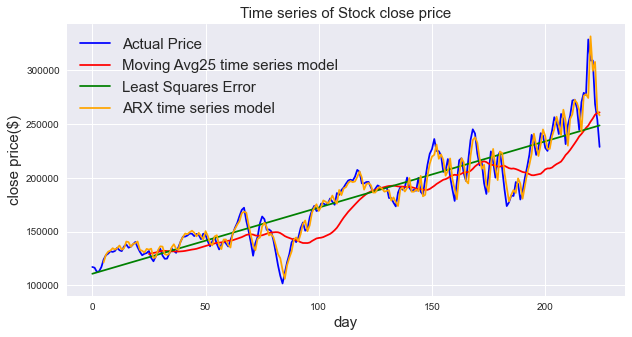

In [29]:
plt.figure(figsize=(10,5))
plt.ylabel('close price($)', fontsize = 15)
plt.xlabel('day', fontsize = 15)
plt.title('Time series of Stock close price', fontsize = 15)
plt.plot(df['ClosePrice'], color = 'blue',label = 'Actual Price')
plt.plot(df[f'Moving Avg_{win}'], color = 'red', label = f'Moving Avg{win} time series model')
plt.plot(df['LSE'], color = 'green', label = 'Least Squares Error')
plt.plot(df['ARX'], color = 'orange', label  = 'ARX time series model')
plt.legend(fontsize = 15)
plt.show()

Regarding plot above, we've plotted Actual price and its 3 predicted values in each day.

### Generalize ARX fitting procedure

To shorten the code, we defined ARX time series predictor as a function

In [30]:
def ARX(data, p, q, noise):
    
    # Prepair data form to feed into the model
    if noise == False:
        arx_data = np.array([(list(data.iloc[i:p+1+i]['ClosePrice']) \
                          + list(data.iloc[p-q+i:p+i]['VolumeTrade'])) for i in range(0,len(data)-p)])
    elif noise == True:
        
        arx_data = np.array([(list(data.iloc[i:p+1+i]['ClosePrice_n']) \
                          + list(data.iloc[p-q+i:p+i]['VolumeTrade'])) for i in range(0,len(data)-p)])
        
    
    # Add constant '1' column to data
    arx_data = sm.add_constant(arx_data)
    
    model = sm.OLS(arx_data[:,p+1], np.delete(arx_data, [p+1], axis = 1))
    results = model.fit()
    arx_value = p*[np.nan] + list(np.dot(np.delete(arx_data, [p+1], axis = 1), results.params))
    
    return arx_value

## Question D:

We added Standard Normal Random variable (`np.random.randn()`) to each days' `ClosePrice`

In [31]:
df['ClosePrice_n'] = [(df.iloc[i]['ClosePrice'] + np.random.randn()) for i in range(len(df))]
df.head()

,day,VolumeTrade,ClosePrice,Moving Avg_25,LSE,ARX,ClosePrice_n
0,1,13981059.0,117060.0,NaN,110750.998623,NaN,117061.284726
1,2,14638230.0,116380.0,NaN,111367.053596,NaN,116378.490968
2,3,16481844.0,112540.0,NaN,111983.108569,NaN,112540.673387
3,4,15047314.0,113040.0,NaN,112599.163541,NaN,113042.401261
4,5,13078436.0,116980.0,NaN,113215.218514,NaN,116980.843911


In the next step we've trained these 3 models noisy close price values. 

**Moving average(win = 25)**

In [32]:
win = 25
df[f'Moving Avg_n_{win}'] = df['ClosePrice_n'].rolling(window= win).mean().shift(1)

**Least square error**

In [33]:
p = LSE(A, np.array(df['ClosePrice_n']))
df['LSE_n'] = p 

**ARX time series model**

In [34]:
arx_value = ARX(df, 5, 3, True)
df['ARX_n'] = arx_value

In [35]:
df.head(30)

,day,VolumeTrade,ClosePrice,Moving Avg_25,LSE,ARX,ClosePrice_n,Moving Avg_n_25,LSE_n,ARX_n
0,1,13981059.0,117060.0,NaN,110750.998623,NaN,117061.284726,NaN,110750.952268,NaN
1,2,14638230.0,116380.0,NaN,111367.053596,NaN,116378.490968,NaN,111367.007295,NaN
2,3,16481844.0,112540.0,NaN,111983.108569,NaN,112540.673387,NaN,111983.062321,NaN
3,4,15047314.0,113040.0,NaN,112599.163541,NaN,113042.401261,NaN,112599.117348,NaN
4,5,13078436.0,116980.0,NaN,113215.218514,NaN,116980.843911,NaN,113215.172374,NaN
5,6,9760153.0,124030.0,NaN,113831.273486,121388.781555,124029.968047,NaN,113831.227400,121389.207390
6,7,10605641.0,127970.0,NaN,114447.328459,128403.966808,127968.472775,NaN,114447.282427,128403.874172
7,8,11499835.0,129490.0,NaN,115063.383432,131292.122203,129490.437728,NaN,115063.337453,131290.486504
8,9,16764687.0,131670.0,NaN,115679.438404,132284.974051,131669.583185,NaN,115679.392480,132285.949008
9,10,16605443.0,131060.0,NaN,116295.493377,134530.688072,131058.694231,NaN,116295.447506,134530.073993


we plotted Actual and noisy close price values and their predicted value by different models

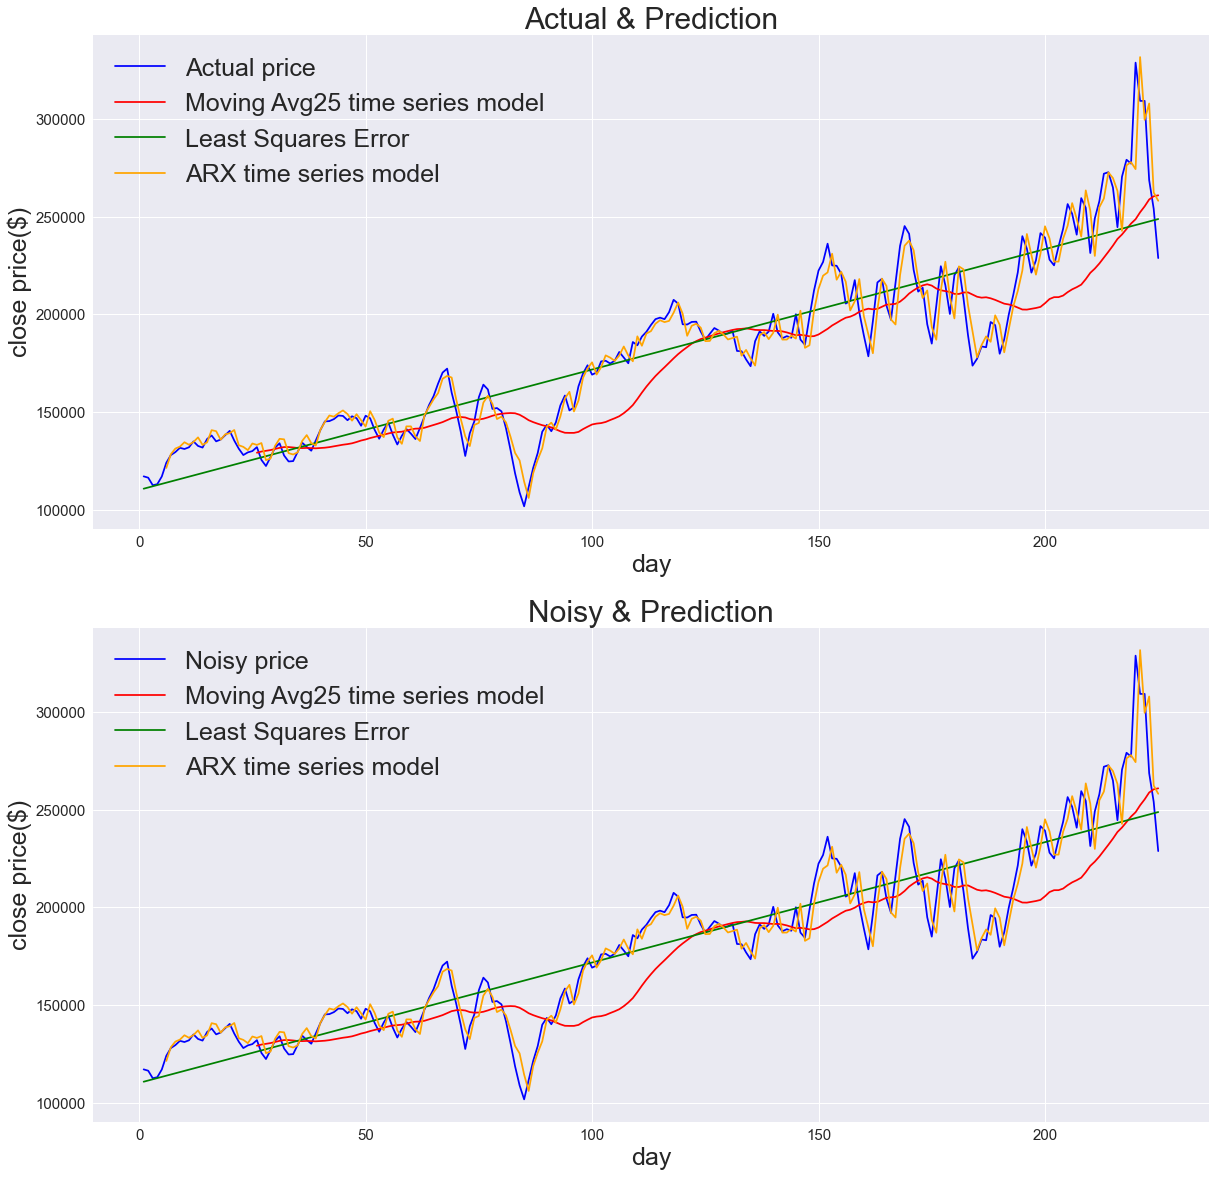

In [36]:
fig, ax = plt.subplots(2,1, figsize = (20, 20))

ax[0].set_title('Actual & Prediction', fontsize = 30)
ax[1].set_title('Noisy & Prediction', fontsize = 30)

ax[0].plot(df['day'], df['ClosePrice'], color = 'blue' , label = 'Actual price')
ax[1].plot(df['day'], df['ClosePrice_n'], color = 'blue' ,label = 'Noisy price')

ax[0].plot(df['day'], df[f'Moving Avg_{win}'], color = 'red' ,label =  f'Moving Avg{win} time series model')
ax[1].plot(df['day'], df[f'Moving Avg_n_{win}'], color = 'red' ,label = f'Moving Avg{win} time series model')

ax[0].plot(df['day'], df['LSE'], color = 'green' ,label = 'Least Squares Error')
ax[1].plot(df['day'], df['LSE_n'], color = 'green', label = 'Least Squares Error')

ax[0].plot(df['day'], df['ARX'], color = 'orange', label = 'ARX time series model')
ax[1].plot(df['day'], df['ARX_n'], color = 'orange', label = 'ARX time series model')

ax[0].set_xlabel(xlabel = 'day', fontsize = 25)
ax[0].set_ylabel(ylabel = 'close price($)', fontsize = 25)
ax[1].set_xlabel(xlabel = 'day', fontsize = 25)
ax[1].set_ylabel(ylabel = 'close price($)', fontsize = 25)

ax[0].legend(fontsize = 25)
ax[1].legend(fontsize = 25)

ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

plt.show()

The charts below are represented for actual and noisy close price values and their corresponding 3 fitted models.

## Question E:

We also calculated the mean squares error for each models that were trained on both noisy and actual close price values.

In [37]:
def report_mse(data, target_col, predicted_col):
    cond = pd.isna(data[predicted_col]) == False
    data = data[cond]
    return np.mean((np.array(data[target_col]) - np.array(data[predicted_col]))**2)

In [38]:
col_name = list(df.columns)
col_name

['day',
 'VolumeTrade',
 'ClosePrice',
 'Moving Avg_25',
 'LSE',
 'ARX',
 'ClosePrice_n',
 'Moving Avg_n_25',
 'LSE_n',
 'ARX_n']

In [39]:
mse_data = {'not_noisy':[report_mse(df, 'ClosePrice', col_name[i]) for i in range(7, 10)],
            'noisy':[report_mse(df, 'ClosePrice', col_name[i]) for i in range(3, 6)]}
final_report = pd.DataFrame(mse_data, index=['Moving Avg_25','LSE','ARX']).T
final_report['noise_status'] = list(final_report.index)
final_report.index = list(range(len(final_report)))
final_report

,Moving Avg_25,LSE,ARX,noise_status
0,4.639853e+08,3.605452e+08,8.758567e+07,not_noisy
1,4.639846e+08,3.605452e+08,8.758758e+07,noisy


In [40]:
final_report = pd.melt(final_report,
                       id_vars='noise_status',
                       value_vars=['Moving Avg_25','LSE','ARX'],
                       var_name = 'models',
                       value_name = 'MSE')
final_report

,noise_status,models,MSE
0,not_noisy,Moving Avg_25,4.639853e+08
1,noisy,Moving Avg_25,4.639846e+08
2,not_noisy,LSE,3.605452e+08
3,noisy,LSE,3.605452e+08
4,not_noisy,ARX,8.758567e+07
5,noisy,ARX,8.758758e+07


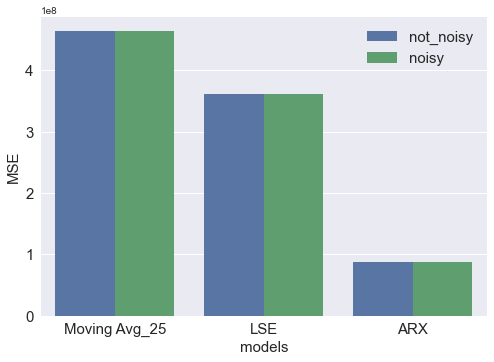

In [41]:
sns.barplot(x = 'models', y = 'MSE', hue = 'noise_status', data = final_report)
plt.legend(fontsize = 15)
plt.xlabel(xlabel = 'models', fontsize = 15)
plt.ylabel(ylabel = 'MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [42]:
df.head()

,day,VolumeTrade,ClosePrice,Moving Avg_25,LSE,ARX,ClosePrice_n,Moving Avg_n_25,LSE_n,ARX_n
0,1,13981059.0,117060.0,NaN,110750.998623,NaN,117061.284726,NaN,110750.952268,NaN
1,2,14638230.0,116380.0,NaN,111367.053596,NaN,116378.490968,NaN,111367.007295,NaN
2,3,16481844.0,112540.0,NaN,111983.108569,NaN,112540.673387,NaN,111983.062321,NaN
3,4,15047314.0,113040.0,NaN,112599.163541,NaN,113042.401261,NaN,112599.117348,NaN
4,5,13078436.0,116980.0,NaN,113215.218514,NaN,116980.843911,NaN,113215.172374,NaN


In [43]:
df.iloc[0:5]

,day,VolumeTrade,ClosePrice,Moving Avg_25,LSE,ARX,ClosePrice_n,Moving Avg_n_25,LSE_n,ARX_n
0,1,13981059.0,117060.0,NaN,110750.998623,NaN,117061.284726,NaN,110750.952268,NaN
1,2,14638230.0,116380.0,NaN,111367.053596,NaN,116378.490968,NaN,111367.007295,NaN
2,3,16481844.0,112540.0,NaN,111983.108569,NaN,112540.673387,NaN,111983.062321,NaN
3,4,15047314.0,113040.0,NaN,112599.163541,NaN,113042.401261,NaN,112599.117348,NaN
4,5,13078436.0,116980.0,NaN,113215.218514,NaN,116980.843911,NaN,113215.172374,NaN


# Question F:

In this section, we want to implement non_linear model (polynomial linear regression) in order to predict the next day close price value. The mathematical explanations are provided below:


Polynomial linear regression is an extension of simple linear regression that allows for modeling non-linear relationships between the independent variable ($x$) and the dependent variable ($y$). In polynomial regression, we introduce polynomial terms of different degrees ($d$) to capture non-linear patterns in the data.

The polynomial regression model can be represented mathematically as follows:

$y = \beta_{0} + \beta_{1}x + \beta_{2}x^{2} + \beta_{3}x^{3} + ...  + \beta_{d}x^{d}$

where:

* $y$ represents the dependent variable.

* $x$ represents the independent vriable.

* $\beta_{0}, \beta_{1}, \beta_{2}, ..., \beta_{d}$ are the coefficient of the model, which determine the relationship between variables.

* $\epsilon$ is the erroe term, representing the deviation of the observed values from the predicted values.

In [44]:
def poly_reg(data, p, degree, noise):
    
    # Prepair data form to feed into the model
    
    if noise == False:
        x = np.array([(list(data.iloc[i:p+1+i]['ClosePrice'])) for i in range(0,len(data)-p)])
    elif noise == True:
        x = np.array([(list(data.iloc[i:p+1+i]['ClosePrice_n'])) for i in range(0,len(data)-p)])
        
    y = x[:,p]
    x = np.delete(x, [p], axis = 1)    
    poly_features = PolynomialFeatures(degree = 2)
    
    x_poly = poly_features.fit_transform(x)
    # Add constant '1' column to data
    x_poly = sm.add_constant(x_poly)
    model = LinearRegression()
    model.fit(x_poly, y)
    poly_pred = p * [np.nan] + list(model.predict(x_poly))
    return poly_pred

In [45]:
df['Poly'] = poly_reg(df, 5, 2, False)
df['Poly_n'] = poly_reg(df, 5, 2, True)

In [46]:
df.head(30)

,day,VolumeTrade,ClosePrice,Moving Avg_25,LSE,ARX,ClosePrice_n,Moving Avg_n_25,LSE_n,ARX_n,Poly,Poly_n
0,1,13981059.0,117060.0,NaN,110750.998623,NaN,117061.284726,NaN,110750.952268,NaN,NaN,NaN
1,2,14638230.0,116380.0,NaN,111367.053596,NaN,116378.490968,NaN,111367.007295,NaN,NaN,NaN
2,3,16481844.0,112540.0,NaN,111983.108569,NaN,112540.673387,NaN,111983.062321,NaN,NaN,NaN
3,4,15047314.0,113040.0,NaN,112599.163541,NaN,113042.401261,NaN,112599.117348,NaN,NaN,NaN
4,5,13078436.0,116980.0,NaN,113215.218514,NaN,116980.843911,NaN,113215.172374,NaN,NaN,NaN
5,6,9760153.0,124030.0,NaN,113831.273486,121388.781555,124029.968047,NaN,113831.227400,121389.207390,121327.123406,121325.042956
6,7,10605641.0,127970.0,NaN,114447.328459,128403.966808,127968.472775,NaN,114447.282427,128403.874172,128291.734089,128292.337711
7,8,11499835.0,129490.0,NaN,115063.383432,131292.122203,129490.437728,NaN,115063.337453,131290.486504,127476.208965,127474.000838
8,9,16764687.0,131670.0,NaN,115679.438404,132284.974051,131669.583185,NaN,115679.392480,132285.949008,130180.561096,130183.262297
9,10,16605443.0,131060.0,NaN,116295.493377,134530.688072,131058.694231,NaN,116295.447506,134530.073993,134560.553565,134557.587725


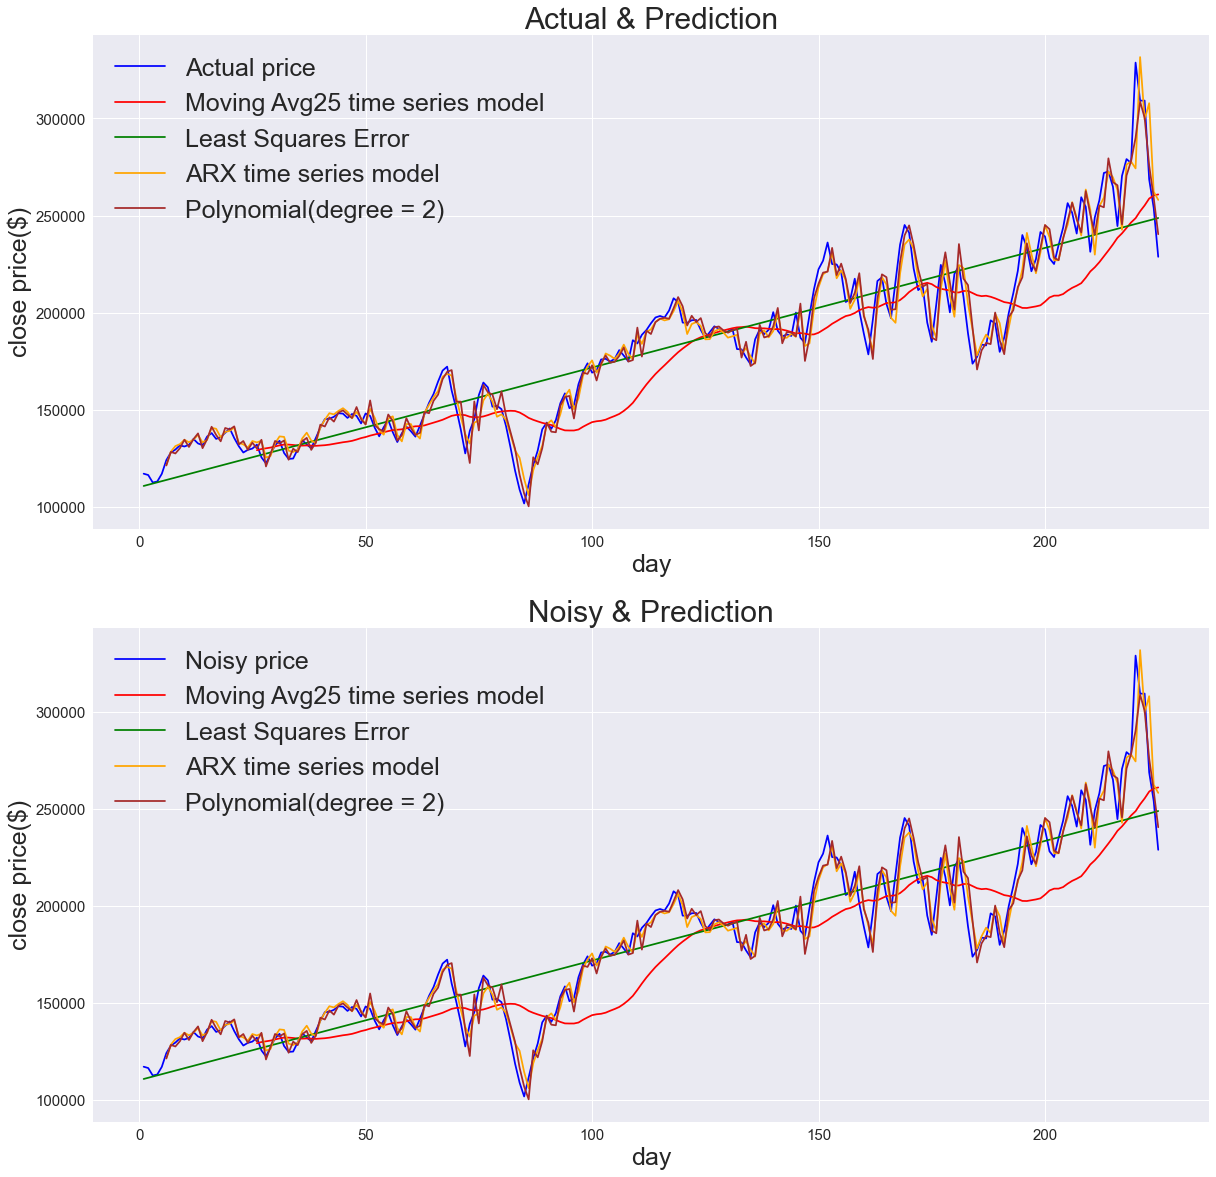

In [47]:
fig, ax = plt.subplots(2,1, figsize = (20, 20))

ax[0].set_title('Actual & Prediction', fontsize = 30)
ax[1].set_title('Noisy & Prediction', fontsize = 30)

ax[0].plot(df['day'], df['ClosePrice'], color = 'blue' , label = 'Actual price')
ax[1].plot(df['day'], df['ClosePrice_n'], color = 'blue' ,label = 'Noisy price')

ax[0].plot(df['day'], df[f'Moving Avg_{win}'], color = 'red' ,label =  f'Moving Avg{win} time series model')
ax[1].plot(df['day'], df[f'Moving Avg_n_{win}'], color = 'red' ,label = f'Moving Avg{win} time series model')

ax[0].plot(df['day'], df['LSE'], color = 'green' ,label = 'Least Squares Error')
ax[1].plot(df['day'], df['LSE_n'], color = 'green', label = 'Least Squares Error')

ax[0].plot(df['day'], df['ARX'], color = 'orange', label = 'ARX time series model')
ax[1].plot(df['day'], df['ARX_n'], color = 'orange', label = 'ARX time series model')

ax[0].plot(df['day'], df['Poly'], color = 'brown', label = 'Polynomial(degree = 2)')
ax[1].plot(df['day'], df['Poly_n'], color = 'brown', label = 'Polynomial(degree = 2)')

ax[0].set_xlabel(xlabel = 'day', fontsize = 25)
ax[0].set_ylabel(ylabel = 'close price($)', fontsize = 25)
ax[1].set_xlabel(xlabel = 'day', fontsize = 25)
ax[1].set_ylabel(ylabel = 'close price($)', fontsize = 25)

ax[0].legend(fontsize = 25)
ax[1].legend(fontsize = 25)

ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

plt.show()

We added Polynomial linear regression predicted values to the plot on both noisy and not noisy subplots.

In [48]:
mse_data = {
            'not_noisy':[report_mse(df, 'ClosePrice', list(df.columns)[i]) for i in range(7, 10)]+[report_mse(df, 'ClosePrice', 'Poly')],
            'noisy':[report_mse(df, 'ClosePrice', list(df.columns)[i]) for i in range(3, 6)]+[report_mse(df, 'ClosePrice', 'Poly_n')]
           }

final_report = pd.DataFrame(mse_data, index=['Moving Avg_25','LSE','ARX', 'Poly']).T

final_report['noise_status'] = list(final_report.index)

final_report.index = list(range(len(final_report)))

final_report

,Moving Avg_25,LSE,ARX,Poly,noise_status
0,4.639853e+08,3.605452e+08,8.758567e+07,7.138310e+07,not_noisy
1,4.639846e+08,3.605452e+08,8.758758e+07,7.138216e+07,noisy


In [49]:
final_report = pd.melt(final_report,
                       id_vars='noise_status',
                       value_vars=['Moving Avg_25','LSE','ARX', 'Poly'],
                       var_name = 'models',
                       value_name = 'MSE')
final_report

,noise_status,models,MSE
0,not_noisy,Moving Avg_25,4.639853e+08
1,noisy,Moving Avg_25,4.639846e+08
2,not_noisy,LSE,3.605452e+08
3,noisy,LSE,3.605452e+08
4,not_noisy,ARX,8.758567e+07
5,noisy,ARX,8.758758e+07
6,not_noisy,Poly,7.138310e+07
7,noisy,Poly,7.138216e+07


We made a comparison between MSE values for models fitted on noisy and actual data and plotted a bar chart to visualize the comparison.

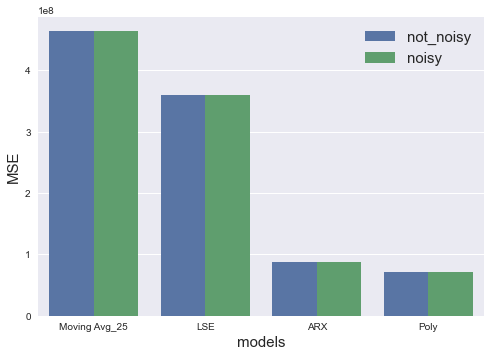

In [50]:
sns.barplot(x = 'models', y = 'MSE', hue = 'noise_status', data = final_report)
plt.legend(fontsize = 15)
plt.xlabel(xlabel = 'models', fontsize = 15)
plt.ylabel(ylabel = 'MSE', fontsize = 15)
plt.show()

In conclusion, the polynomial linear regression(d=2) give us a better result in comparison with the other ones.

# PART II: Linear regression

## Question A,B,C,D,E,F,G

We are given a dataset below:

$A = [(1,4),(2,12),(3,28),(4,52),(5,80)]$

Linear regression model’s coefficients and its MSE are computed like what we formulate below:


$m = \frac{\sum_{i = 1}^{n} (x_{i} - \bar x)(y_{i} - \bar y)}{\sum_{i = 1}^{n} (x_{i} - \bar x)^{2}}$

$ b = \bar y - m\bar x$

$\hat y = mx + b$

$MSE = \frac{1}{n} \sum_{i = 1}^{n} (y_{i} - \hat y_{i})^{2}$

In [51]:
arr = np.array([[1,4],[2,12],[3,28],[4,52],[5,80]])
arr

array([[ 1,  4],
       [ 2, 12],
       [ 3, 28],
       [ 4, 52],
       [ 5, 80]])

In [52]:
avg = np.mean(arr,axis = 0)
avg

array([ 3. , 35.2])

In [53]:
xy = arr - avg
xy

array([[ -2. , -31.2],
       [ -1. , -23.2],
       [  0. ,  -7.2],
       [  1. ,  16.8],
       [  2. ,  44.8]])

In [54]:
m = np.sum(xy[:,0]*xy[:,1])/np.sum(xy[:,0]**2)
m

19.2

In [55]:
b = avg[1] - m * avg[0]
b

-22.39999999999999

In [56]:
data = {
        'x': arr[:,0],
        'y': arr[:,1],
        'y_hat': m * arr[:,0] + b
       }

In [57]:
data = pd.DataFrame(data)
data

,x,y,y_hat
0,1,4,-3.2
1,2,12,16.0
2,3,28,35.2
3,4,52,54.4
4,5,80,73.6


In [58]:
data = pd.melt(data, id_vars='x', value_vars=['y', 'y_hat'], var_name='actual|predicted', value_name='value')
data

,x,actual|predicted,value
0,1,y,4.0
1,2,y,12.0
2,3,y,28.0
3,4,y,52.0
4,5,y,80.0
5,1,y_hat,-3.2
6,2,y_hat,16.0
7,3,y_hat,35.2
8,4,y_hat,54.4
9,5,y_hat,73.6


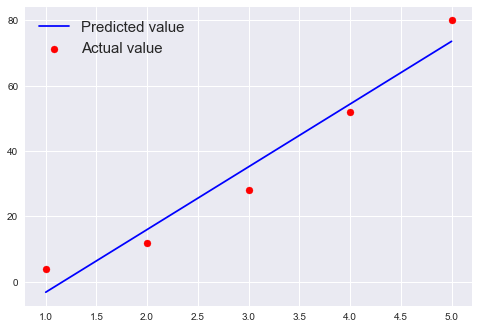

In [65]:
fig, ax = plt.subplots()
cond1 =  data['actual|predicted'] == 'y'
ax.scatter(data[cond1]['x'], data[cond1]['value'], color = 'red', label = 'Actual value')
cond2 = data['actual|predicted'] == 'y_hat'
ax.plot(data[cond2]['x'], data[cond2]['value'], color = 'blue', label = 'Predicted value')
plt.legend(fontsize = 15)
plt.show()

In [66]:
Ea = np.mean((np.array(data[cond1].loc[:, 'value']) - np.array(data[cond2].loc[:, 'value']))**2)
Ea

33.27999999999999

In [67]:
def MSE(arr, m, b):
    pred = m * arr[:,0] + b
    return np.mean((pred - arr[:,1])**2)

In [68]:
MSE(arr, 19.2, -22.39999999999999)

33.27999999999999

In [69]:
def Reg(arr):
    # coefficients
    xy = arr - np.mean(arr,axis = 0)
    m = np.sum(xy[:,0] * xy[:,1]) / np.sum(xy[:,0]**2)
    b = avg[1] - m * avg[0]
    # Mean square error
    mse = MSE(arr, m, b)
    return m, b, mse   

In [70]:
Reg(arr)

(19.2, -22.39999999999999, 33.27999999999999)

$m = 19.2$

$b = -22.3\bar 9$

$MSE = 33.27 \bar9$

## Question H

We defined 2 for loops in order to calculate the mse of different combination of M and b values.

In [71]:
m, b = Reg(arr)[0], Reg(arr)[1]
m_array = np.arange(m-1, m+1, 2/1000)
b_array = np.arange(b-2, b+2, 4/1000)

In [72]:
report = {'m':[], 'b':[], 'mse':[]}
for M in m_array:
    for B in b_array:
        report['m'].append(M)
        report['b'].append(B)
        report['mse'].append(MSE(arr, M, B))
        
report = pd.DataFrame(report)     

In [73]:
report

,m,b,mse
0,18.200,-24.400,60.280000
1,18.200,-24.396,60.240016
2,18.200,-24.392,60.200064
3,18.200,-24.388,60.160144
4,18.200,-24.384,60.120256
...,...,...,...
999995,20.198,-20.420,60.012684
999996,20.198,-20.416,60.052492
999997,20.198,-20.412,60.092332
999998,20.198,-20.408,60.132204


In [74]:
report[report['mse'] == np.min(report['mse'])]

,m,b,mse
500500,19.2,-22.4,33.28


## Question J

To prove that the OLS estimators are BLUE, we need to show two properties: unbiasedness and minimum variance.

* **Unbiasedness:**
The OLS estimators are unbiased, meaning that their expected values are equal to the true parameter values. Mathematically, this can be represented as:     $E(b) = β$    The proof of unbiasedness is based on the assumption that the error term $ε$ has a mean of zero and is uncorrelated with the predictor variables. Under these assumptions, it can be shown that the OLS estimators are unbiased.



* **Minimum Variance:**
The OLS estimators have minimum variance among all linear unbiased estimators. In other words, if we consider any other linear unbiased estimator, the OLS estimators will have smaller variances.
To prove the minimum variance property, we need to compare the variance-covariance matrix of the OLS estimators with the variance-covariance matrices of other linear unbiased estimators. It can be shown that the OLS estimators have the smallest variance-covariance matrix among all linear unbiased estimators, given the assumptions of the Gauss-Markov theorem, which include homoscedasticity (constant variance of errors) and no multicollinearity among predictor variables.

In [82]:
def det_var_cov(arr, m, b):
    variance = MSE(arr, m, b)
    X = np.column_stack((np.ones(len(arr)), arr[:,0]))
    return np.linalg.det(variance * np.linalg.inv(np.dot(X.T, X)))

In [83]:
report = {'m':[], 'b':[], 'mse':[], 'det_varcov': [], 'epsilon':[]}
for M in m_array:
    for B in b_array:
        report['m'].append(M)
        report['b'].append(B)
        report['mse'].append(MSE(arr, M, B))
        report['det_varcov'].append(det_var_cov(arr, M, B))
        report['epsilon'].append(np.mean(arr[:,1] - (M * arr[:,0] + B)))
        
report = pd.DataFrame(report)     

In [84]:
report

,m,b,mse,det_varcov,epsilon
0,18.200,-24.400,60.280000,72.673568,5.000
1,18.200,-24.396,60.240016,72.577191,4.996
2,18.200,-24.392,60.200064,72.480954,4.992
3,18.200,-24.388,60.160144,72.384859,4.988
4,18.200,-24.384,60.120256,72.288904,4.984
...,...,...,...,...,...
999995,20.198,-20.420,60.012684,72.030445,-4.974
999996,20.198,-20.416,60.052492,72.126036,-4.978
999997,20.198,-20.412,60.092332,72.221767,-4.982
999998,20.198,-20.408,60.132204,72.317639,-4.986


In [90]:
report[report['det_varcov'] == np.min(report['det_varcov'])]

,m,b,mse,det_varcov,epsilon
500500,19.2,-22.4,33.28,22.151168,9.883649e-13


Item 500500 in data frame has the least value for determinant of variance-covariance matrix. We can deduce that the OLS method give us a minimum variance 

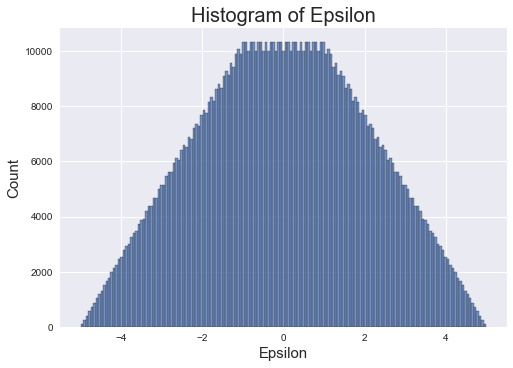

In [89]:
plt.title('Histogram of Epsilon', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Epsilon', fontsize = 15)
sns.histplot(report.epsilon)
plt.show()

The epsilon histogram implies that it has the mean of **zero**

Hence, The OLS method gives us a Best Linear Unbiased Estimation (**BLUE**) on the given data.

## Question K

The mentioned algorithm in the problem and Least Squares Error are the same but they have 2 different approaches in estimating the same coefficients. The first one take the partial derivatives of Sum of Squared Error and make them equal to 0.


On the other hand, Least Squares Error method uses algebraic attitude in a way that to project the point onto the line by using projection matrix.


## Question I

In this part we compare MSE value of 3 models (close price with out noise, close price with noise, average of 100 MSE value on different noisy close price). We visualize this comparison below:

In [73]:
def make_noise(arr):
    return arr + np.column_stack((len(arr)*[0],np.random.randn(len(arr))))

In [74]:
make_noise(arr)

array([[ 1.        ,  4.17623156],
       [ 2.        , 13.46360785],
       [ 3.        , 26.96733107],
       [ 4.        , 52.10263428],
       [ 5.        , 80.37347808]])

In [75]:
# Arr
mse1 = Reg(arr)[2]
print(f'Arr_MSE: {mse1}')
# Arr + noise
mse2 = Reg(make_noise(arr))[2]
print(f'Arr_noise_MSE: {mse2}')
# mean(Arr + noise for i in range(100))
mse3 = np.mean([Reg(make_noise(arr))[2] for i in range(100)])
print(f'Mean_Arr_noise_MSE: {mse3}')

Arr_MSE: 33.27999999999999
Arr_noise_MSE: 35.588843932038685
Mean_Arr_noise_MSE: 33.219063953142076


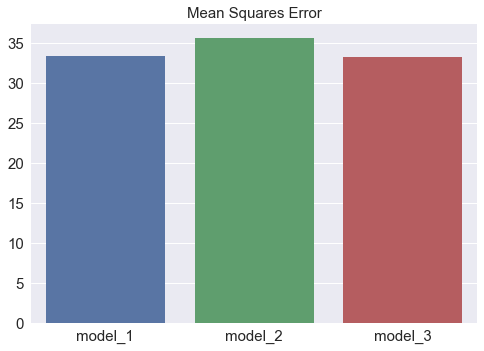

In [78]:
y_axis = [mse1, mse2, mse3]
x_axis = ['model_1', 'model_2', 'model_3']
sns.barplot(x=x_axis, y=y_axis)
plt.title('Mean Squares Error', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()